In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import os
!pip install downcast
from downcast import reduce
!pip install phik
import phik
from phik import resources, report
#gender_mobile_data.phik_matrix()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Business Problem**

TalkingData is China's leading third-party data intelligence solution provider which strives to empower enterprises with data-driven digital transformation.In the last seven years, TalkingData's vision of using "big data for smarter business decisions and a better world" has allowed it to gradually become China's leading data intelligence solution provider.

In July 2016 TalkData released a Kaggle Competition to predict the demographics of a Mobile User by providing Mobile Device details of 70% of daily active users in China to help its clients better understand and interact with their audiences.

In this competition, Kagglers are challenged to build a model predicting users’ demographic characteristics (Age & Gender) based on their app usage, Geo-location, and mobile device properties. Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.


# **ML Formulation:**
After doing EDA and Preprocessing the available training Data  a Supervised machine learning model or a deep learning model can be applied on best features of the training data to predict the demographics of mobile users.


# **Data columns/featuires Overview:**

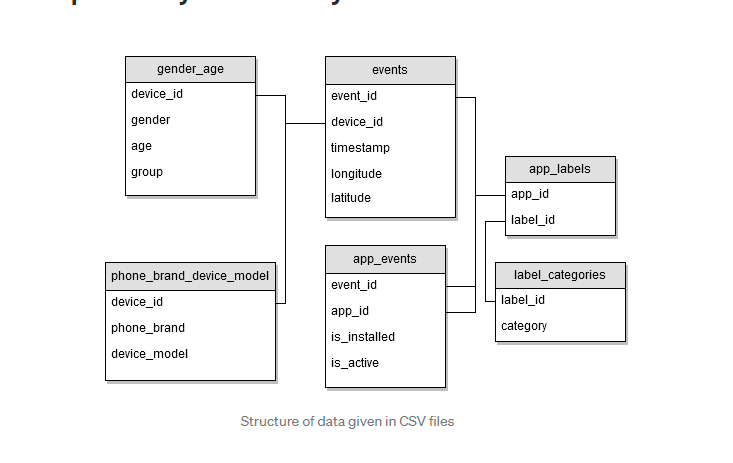


•	Device_ID: Dataytpe=Integer.Unique number  given to the User’s Mobile

•	Gender: Dataytpe=Categorical. Gender of the User ,M for Male & F for Female

•	Age: Dataytpe=Integer.Age of the user

•	Group: Dataytpe=Categorical. This is the Target class for our problem and 
contains the classes which we need to predict. The first letter denotes the gender of the user and it is followed by the age group to which the user belongs.

•	Event_ID: Dataytpe=Integer. Unique number  given to the Event

•	Label_ID: Dataytpe=Integer. Unique number  given to the Label

•	Phone_Brand: Dataytpe=Categorical. Brand name of the Mobile

•	Device_Model: Dataytpe=Categorical. Model name of the device with in the Brand

•	Time_Stamp: Dataytpe=Integer. Time of the event happening

•	Latitude-Longitude: Dataytpe=Integer. geo-location where event is happening

•	App_ID: Dataytpe=Integer. Unique number  given to the Label

•	Is_Installed: Dataytpe=Categorical. Is the Application installed?
0-not installed, 1-Installed
•	Is_Active: Dataytpe=Categorical. Is the Application active
0-Not Active, 1-Active

•	Category: Dataytpe=Categorical. Category of application like finance, sports etc.


# **Performance matric:**
Multi Class Logarithmic -Loss: Each device has been labelled with one true class. For each device, we have to predict a set of predicted probabilities (one for each class). The formula is
 
where N is the number of devices in the test set, M is the number of class labels, log is the natural logarithm, yij is 1 if device i belongs to class j and 0 otherwise, and pij is the predicted probability that observation ii belongs to class j.



# **References**

1.https://www.kaggle.com/beyondbeneath/geolocation-visualisations

2.https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/23424 by Yiyun Chen

3.https://arxiv.org/abs/1603.00059

4.https://www.kaggle.com/dvasyukova/a-linear-model-on-apps-and-labels



## Load data

**1.Training data**

In [ ]:
datadir = '/content/drive/MyDrive/Talkingdata_CS1/talkingdata-mobile-user-demographics/data/'
gender_age_train = pd.read_csv(os.path.join(datadir,'gender_age_train.csv'),index_col='device_id')
gender_age_train.head()

,gender,age,group
device_id,,,
-8076087639492063270,M,35,M32-38
-2897161552818060146,M,35,M32-38
-8260683887967679142,M,35,M32-38
-4938849341048082022,M,30,M29-31
245133531816851882,M,30,M29-31


2.Test Data

In [ ]:
gender_age_test = pd.read_csv(os.path.join(datadir,'gender_age_test.csv'),index_col = 'device_id')
gender_age_test.head()

""
device_id
1002079943728939269
-1547860181818787117
7374582448058474277
-6220210354783429585
-5893464122623104785


3.Database of Phone brands and its Models

In [ ]:
phone_brand_device_model = pd.read_csv(os.path.join(datadir,'phone_brand_device_model.csv'))
phone_brand_device_model = phone_brand_device_model.drop_duplicates('device_id',keep='first').set_index('device_id')
phone_brand_device_model.head()


,phone_brand,device_model
device_id,,
-8890648629457979026,小米,红米
1277779817574759137,小米,MI 2
5137427614288105724,三星,Galaxy S4
3669464369358936369,SUGAR,时尚手机
-5019277647504317457,三星,Galaxy Note 2


In [ ]:
#Changing the brand names from Chinese to English 
English_phone_brands = {"三星": "samsung", "天语": "Ktouch","海信": "hisense", "联想": "lenovo",   "欧比": "obi",    "爱派尔": "ipair",  
"努比亚": "nubia",  "优米": "youmi","朵唯": "dowe", "黑米": "heymi","锤子": "hammer","酷比魔方": "koobee","美图": "meitu","尼比鲁": "nibilu",
    "一加": "oneplus","优购": "yougo","诺基亚": "nokia", "糖葫芦": "candy","中国移动": "ccmc", "语信": "yuxin","基伍": "kiwu","青橙": "greeno",
    "华硕": "asus", "夏新": "panosonic", "维图": "weitu","艾优尼": "aiyouni","摩托罗拉": "moto", "乡米": "xiangmi", "米奇": "micky",
    "大可乐": "bigcola", "沃普丰": "wpf", "神舟": "hasse",  "摩乐": "mole","飞秒": "fs","米歌": "mige", "富可视": "fks", "德赛": "desci",
    "梦米": "mengmi","乐视": "lshi","小杨树": "smallt","纽曼": "newman", "邦华": "banghua", "E派": "epai", "易派": "epai", "普耐尔": "pner",
    "欧新": "ouxin",   "西米": "ximi",  "海尔": "haier",  "波导": "bodao", "糯米": "nuomi", "唯米": "weimi", "酷珀": "kupo",  "谷歌": "google",
    "昂达": "ada" ,    "聆韵": "lingyun",  "小米": "Xiaomi", "华为": "Huawei", "魅族": "Meizu", "中兴": "ZTE",   "酷派": "Coolpad",    "金立": "Gionee",
    "SUGAR": "SUGAR",   "OPPO": "OPPO",   "vivo": "vivo",  "HTC": "HTC",   "LG": "LG", "ZUK": "ZUK",   "TCL": "TCL", "LOGO": "LOGO","Lovme": "Lovme",
    "PPTV": "PPTV", "ZOYE": "ZOYE", "MIL": "MIL",   "索尼" : "Sony","欧博信" : "Opssom",  "奇酷" : "Qiku","酷比" : "CUBE", "康佳" : "Konka",
    "亿通" : "Yitong",   "金星数码" : "JXD","至尊宝" : "Monkey King", "百立丰" : "Hundred Li Feng","贝尔丰" : "Bifer","百加" : "Bacardi", "诺亚信" : "Noain",
    "广信" : "Kingsun",  "世纪天元" : "Ctyon", "青葱" : "Cong", "果米" : "Taobao","斐讯" : "Phicomm", "长虹" : "Changhong", "欧奇" : "Oukimobile",
      "先锋" : "XFPLAY","台电" : "Teclast","大Q" : "Daq","蓝魔" : "Ramos", "奥克斯" : "AUX"
}

phone_brand_device_model.phone_brand = phone_brand_device_model.phone_brand.map(pd.Series(English_phone_brands), na_action='ignore')
phone_brand_device_model.head()

,phone_brand,device_model
device_id,,
-8890648629457979026,Xiaomi,红米
1277779817574759137,Xiaomi,MI 2
5137427614288105724,samsung,Galaxy S4
3669464369358936369,SUGAR,时尚手机
-5019277647504317457,samsung,Galaxy Note 2


4.Database of Events with Device info logged 

In [ ]:
events_data = pd.read_csv(os.path.join(datadir,'events.csv'),parse_dates=['timestamp'], index_col='event_id')
events_data['event_id']=events_data.index
events_data.head()

,device_id,timestamp,longitude,latitude,event_id
event_id,,,,,
1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,1
2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,2
3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,3
4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,4
5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,5


5.Database of events with apps

In [ ]:
apps_events_data = pd.read_csv(os.path.join(datadir,'app_events.csv'), usecols=['event_id','app_id','is_active'],dtype={'is_active':bool})
apps_events_data.head()

,event_id,app_id,is_active
0,2,5927333115845830913,True
1,2,-5720078949152207372,False
2,2,-1633887856876571208,False
3,2,-653184325010919369,True
4,2,8693964245073640147,True


5.Database of Apps

In [ ]:
apps_label_data = pd.read_csv(os.path.join(datadir,'app_labels.csv'))
apps_label_data.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


# **EDA**

In [ ]:
#Merging train data and phone database:
gender_age_train_v1 = pd.merge(left=gender_age_train, right=phone_brand_device_model, left_on='device_id', right_on='device_id')
gender_age_train_v1.head()

,gender,age,group,phone_brand,device_model
device_id,,,,,
-8076087639492063270,M,35,M32-38,Xiaomi,MI 2
-2897161552818060146,M,35,M32-38,Xiaomi,MI 2
-8260683887967679142,M,35,M32-38,Xiaomi,MI 2
-4938849341048082022,M,30,M29-31,Xiaomi,红米note
245133531816851882,M,30,M29-31,Xiaomi,MI 3


In [ ]:
#Picking up top ten models and top ten phone brands for EDA purpose .
Top_Ten_Brands=gender_age_train_v1['phone_brand'].value_counts()[0:10]
Top_Ten_Brands=Top_Ten_Brands.to_dict()

Top_Ten_Phone_Models=gender_age_train_v1['device_model'].value_counts()[0:15]
Top_Ten_Phone_Models=Top_Ten_Phone_Models.to_dict()

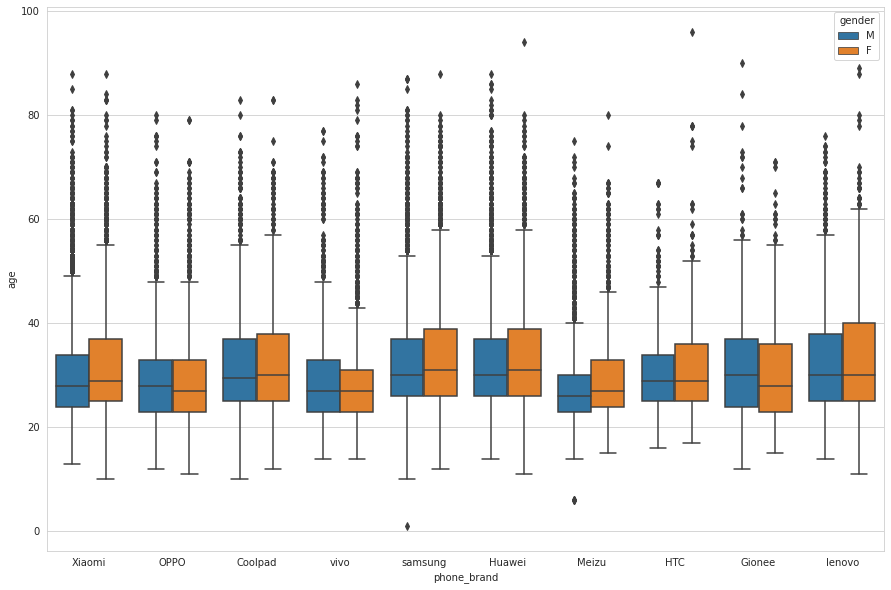

In [ ]:
#Boxplot between Phone Brands & Age:
gender_mobile_data1=gender_age_train_v1.loc[gender_age_train_v1['phone_brand'].isin(Top_Ten_Brands.keys())]
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(x = 'phone_brand', y = 'age',hue='gender' ,data = gender_mobile_data1)

Observation:

Samsung ,Huawei & Lenovo brands are used by old age people
Vivo & Meozu are mostly used by Young age people

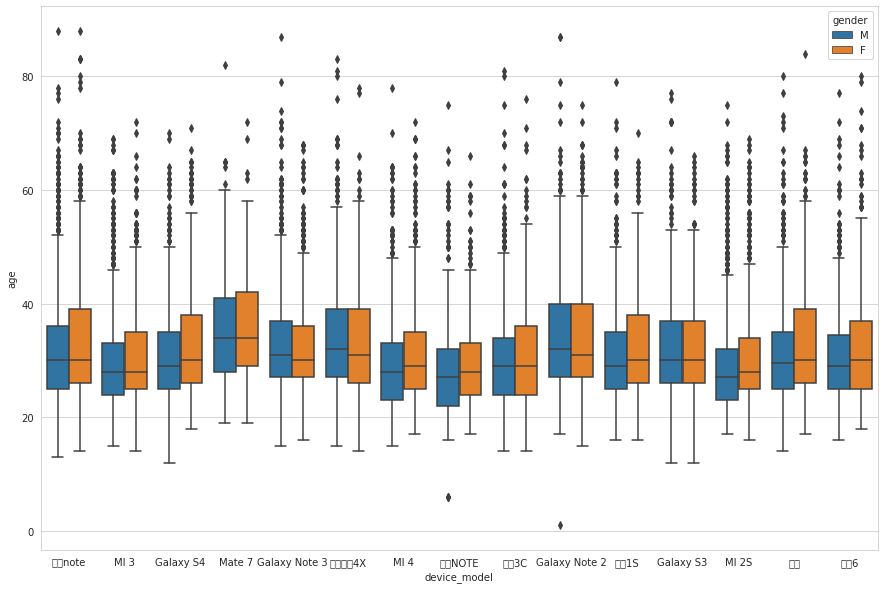

In [ ]:
gender_mobile_data2=gender_age_train_v1.loc[gender_age_train_v1['device_model'].isin(Top_Ten_Phone_Models.keys())]
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(x = 'device_model', y = 'age',hue='gender' ,data = gender_mobile_data2)

Observation:

Mate7 and Galaxy Note 2  are mostly used Phone Models by old people
MI4 ,Redmi Note,MI2s  are mostly used Phone Models by Young people


In [ ]:
gender_age_train_v1.phik_matrix()

interval columns not set, guessing: ['age']


,gender,age,group,phone_brand,device_model
gender,1.000000,0.086902,1.000000,0.157178,0.222658
age,0.086902,1.000000,0.762848,0.198424,0.331543
group,1.000000,0.762848,1.000000,0.245173,0.356574
phone_brand,0.157178,0.198424,0.245173,1.000000,0.999958
device_model,0.222658,0.331543,0.356574,0.999958,1.000000


Observation:

Correlation value between phone_brand & group =0.245

Correlation value between device_model & group =0.356


In [ ]:
#Merging train data with event database
gender_age_train_v2 = pd.merge(left=gender_age_train_v1, right=events_data, left_on='device_id', right_on='device_id')
gender_age_train_v2.head()


,device_id,gender,age,group,phone_brand,device_model,timestamp,longitude,latitude,event_id
0,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2,2016-05-01 14:23:37,0.00,0.00,2479656
1,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,2016-05-04 14:10:03,119.57,31.75,280934
2,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,2016-05-04 14:13:30,119.57,31.75,363585
3,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,2016-05-06 18:51:15,0.00,0.00,935225
4,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,2016-05-04 14:09:29,119.57,31.75,1551108


In [ ]:
print('Number of devices with events datat logged:',len(gender_age_train_v2['device_id'].unique()))
print('Number of train data devices:',len(gender_age_train))
print('Percentage of train data devices have event data logged:',23309/74645)

Number of devices with events datat logged: 23309
Number of train data devices: 74645
Percentage of train data devices have event data logged: 0.3122647196731194


OBSERVATION:

 Only 31% of devices has the the event data logged so the event and app data features can only be used for training this 31% of data.
 
 In this case we can divide the data into data with events and data without events and train individually with different models for better results

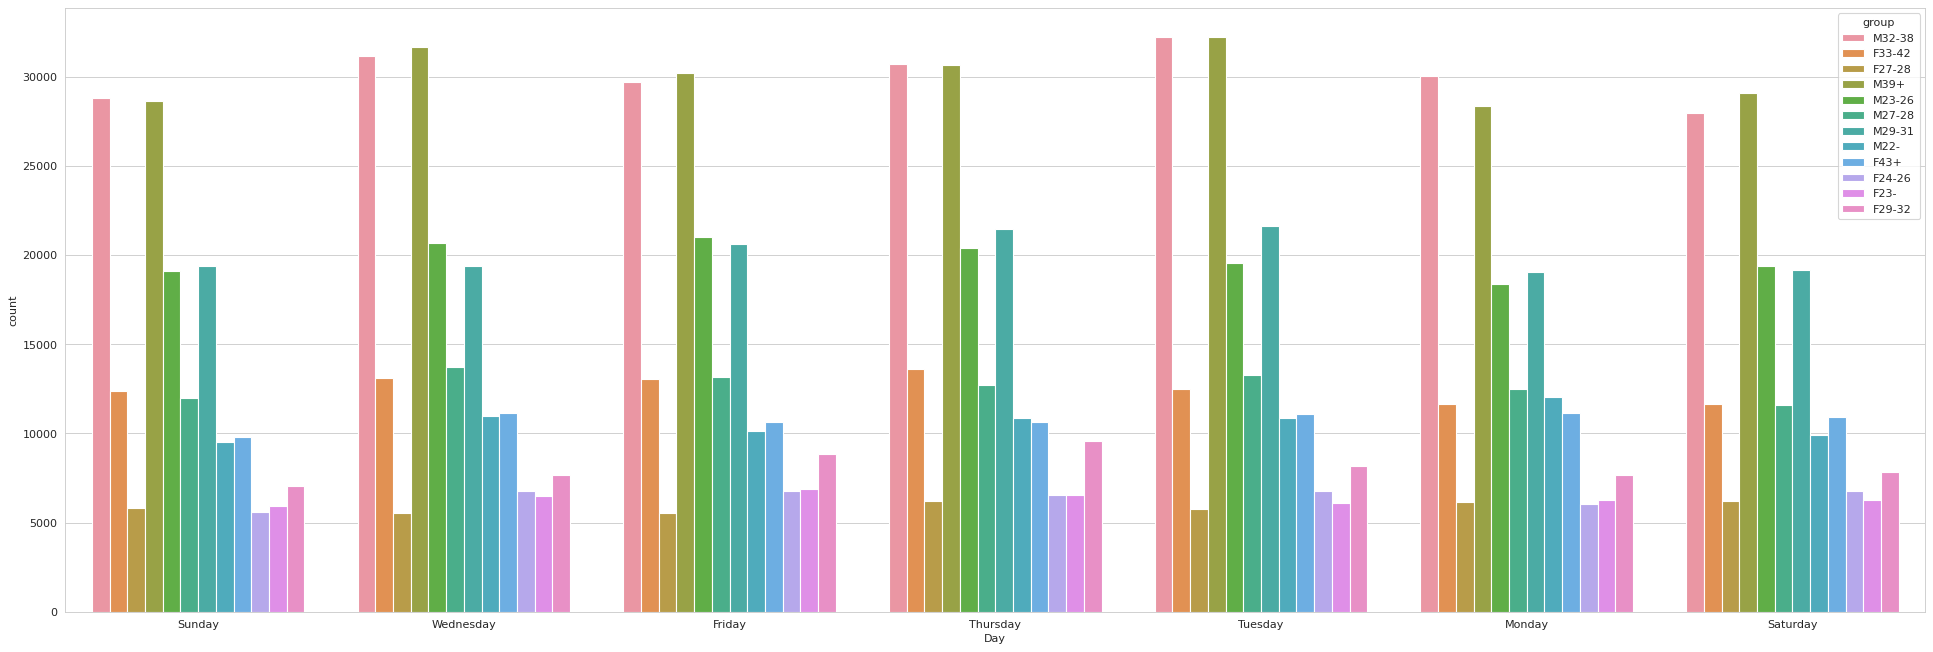

In [ ]:
import calendar
from matplotlib.pyplot import figure
gender_age_train_v2['timestamp']=pd.to_datetime(gender_age_train_v2.timestamp)
gender_age_train_v2['Day'] = gender_age_train_v2.timestamp.dt.day_name()
figure(figsize=(30, 10), dpi=80)
sns.countplot(x="Day",hue="group", data=gender_age_train_v2)

Observation:

Distribution of Groups across different days is almost uniform but still it can be used as a feature for training

<Figure size 432x288 with 0 Axes>

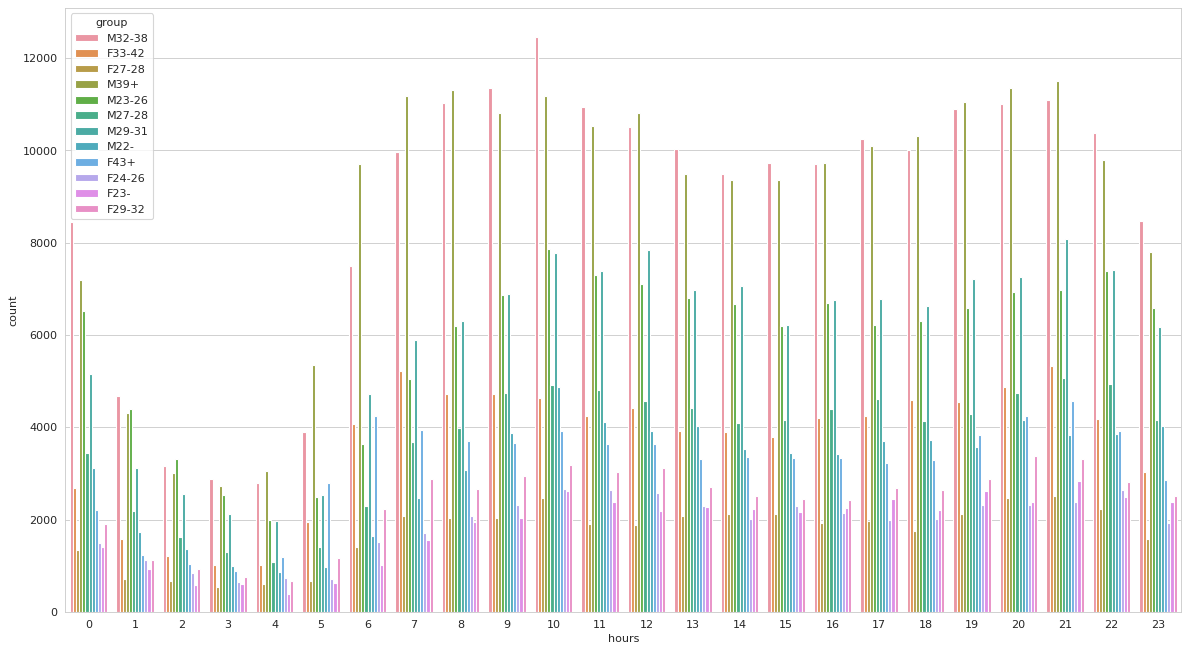

In [ ]:
plt.figure()
gender_age_train_v2['hours'] = gender_age_train_v2['timestamp'].apply(lambda x: x.hour)
figure(figsize=(18, 10), dpi=80)
sns.countplot(x='hours',hue='group' ,data=gender_age_train_v2)

Observation:

 Distribution of Groups across the time-hour of the events not well uniform and it can a good feature for training

In [ ]:
!pip3 install https://github.com/matplotlib/basemap/archive/master.zip

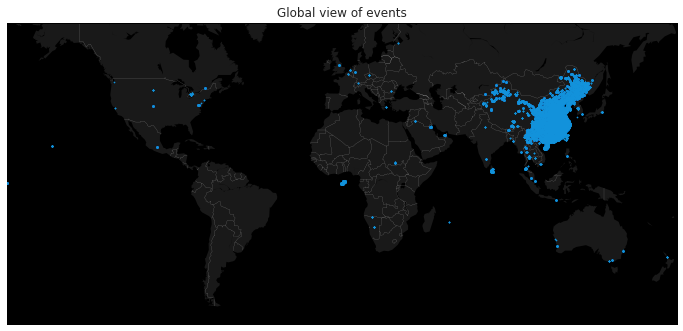

In [ ]:
#https://www.kaggle.com/beyondbeneath/geolocation-visualisations
from mpl_toolkits.basemap import Basemap
%matplotlib inline
# Set up plot
plt.figure(1, figsize=(12,12))

# Mercator of World
maps = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

maps.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
maps.drawmapboundary(fill_color='#000000')                # black background
maps.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mapping = maps(events_data["longitude"].tolist(), events_data["latitude"].tolist())
maps.scatter(mapping[0], mapping[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()

In [ ]:
print('Number of 0.00 0.00 locations :',len(events_data.loc[events_data['latitude']==0.00].loc[events_data['longitude']==0.00]))

Number of 0.00 0.00 locations : 968675


Observation:

From the Location data we see that events are logged for the location outside the china as well .Some users could have used VPN as well which misinterprets the actual location.There is also a major  outlier with location 0.00 0.000 value.

In [ ]:
gender_age_train_v2=reduce(gender_age_train_v2)
gender_age_train_v2_dropped=gender_age_train_v2.drop(['gender','age','timestamp','event_id','longitude','latitude'],axis=1)
gender_age_train_v2_dropped.phik_matrix()

interval columns not set, guessing: ['device_id', 'hours']


,device_id,group,phone_brand,device_model,Day,hours
device_id,1.000000,0.124884,0.288936,0.692868,0.035137,0.035300
group,0.124884,1.000000,0.353748,0.734662,0.032951,0.072424
phone_brand,0.288936,0.353748,1.000000,0.999975,0.076556,0.083840
device_model,0.692868,0.734662,0.999975,1.000000,0.250803,0.259891
Day,0.035137,0.032951,0.076556,0.250803,1.000000,0.031595
hours,0.035300,0.072424,0.083840,0.259891,0.031595,1.000000


Observation:

The feature day and hour doesn't have more effect on group with corrleation values 0.03 & 0.07 respectively but we can give a try and use them for prediction

Overall Observation:

In the given training data male users are approximately two times the female users.And only 31% of devices have event data logged .

Phone brand and Model can be used for training data with out events data.

Event day ,event hour , app & app labels  can be used along with phone brand and phone model for traning data without events.